In [36]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import mis_funciones as mf

%config IPCompleter.greedy = True 

#Quitamos la anotación cientifica
pd.options.display.float_format = '{:15.2f}'.format

In [52]:
df = pd.read_pickle('../Datos/df.pickle')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 136472 entries, 2020-05-15 00:00:00 to 2020-06-17 23:45:00
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   planta         136472 non-null  object 
 1   inverter_id    136472 non-null  object 
 2   kw_ac          136472 non-null  float64
 3   kw_dc          136472 non-null  float64
 4   kw_dia         136472 non-null  float64
 5   kw_total       136472 non-null  float64
 6   sensor_id      136472 non-null  object 
 7   t_ambiente     136472 non-null  float64
 8   t_modulo       136472 non-null  float64
 9   t_irradiacion  136472 non-null  float64
dtypes: float64(7), object(3)
memory usage: 11.5+ MB


In [54]:
def componentes_fecha (dataframe):
    ano = dataframe.index.year
    mes = dataframe.index.month
    dia = dataframe.index.day
    hora = dataframe.index.hour
    minuto = dataframe.index.minute
    
    fechas = pd.DataFrame(({'ano':ano ,'mes':mes ,'dia':dia ,'hora':hora ,'minuto':minuto}))
    
    return pd.concat([df.reset_index(),fechas], axis=1)

df = componentes_fecha(df)

In [55]:
df = df.set_index('fecha')
df

,planta,inverter_id,kw_ac,kw_dc,kw_dia,kw_total,sensor_id,t_ambiente,t_modulo,t_irradiacion,ano,mes,dia,hora,minuto
fecha,,,,,,,,,,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,2020,5,15,0,0
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,2020,5,15,0,0
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,2020,5,15,0,0
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,2020,5,15,0,0
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,2020,5,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,2020,6,17,23,45
2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,2020,6,17,23,45
2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,2020,6,17,23,45


In [56]:
def eficiencia_inverter (AC,DC):
    temp = AC / DC * 100
    return (temp.fillna(0))

In [57]:
df['eficiencia'] = eficiencia_inverter(df.kw_ac,df.kw_dc)
df

,planta,inverter_id,kw_ac,kw_dc,kw_dia,kw_total,sensor_id,t_ambiente,t_modulo,t_irradiacion,ano,mes,dia,hora,minuto,eficiencia
fecha,,,,,,,,,,,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,2020,5,15,0,0,0.00
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,2020,5,15,0,0,0.00
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,2020,5,15,0,0,0.00
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,2020,5,15,0,0,0.00
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00,2020,5,15,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,2020,6,17,23,45,0.00
2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,2020,6,17,23,45,0.00
2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00,2020,6,17,23,45,0.00


In [58]:
df.eficiencia.isna().sum()

0

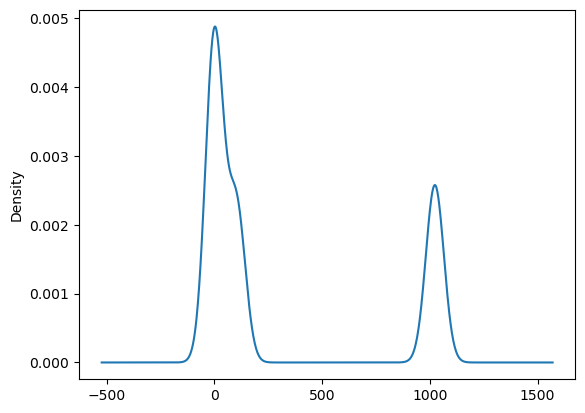

In [59]:
df.eficiencia.plot.kde();

In [60]:
df.eficiencia.describe()

count         136472.00
mean             300.16
std              441.53
min                0.00
25%                0.00
50%              101.75
75%             1018.44
max             1046.55
Name: eficiencia, dtype: float64

In [63]:
orden = ['planta','ano','mes','hora','minuto','sensor_id','t_irradiacion','t_ambiente','t_modulo','inverter_id','kw_dc','kw_ac','eficiencia','kw_dia','kw_total']


In [65]:
df = df[orden]
df = df[orden]
df.head()

,planta,ano,mes,hora,minuto,sensor_id,t_irradiacion,t_ambiente,t_modulo,inverter_id,kw_dc,kw_ac,eficiencia,kw_dia,kw_total
fecha,,,,,,,,,,,,,,,
2020-05-15,p1,2020,5,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,1BY6WEcLGh8j5v7,0.00,0.00,0.00,0.00,6259559.00
2020-05-15,p1,2020,5,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,1IF53ai7Xc0U56Y,0.00,0.00,0.00,0.00,6183645.00
2020-05-15,p1,2020,5,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,3PZuoBAID5Wc2HD,0.00,0.00,0.00,0.00,6987759.00
2020-05-15,p1,2020,5,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,7JYdWkrLSPkdwr4,0.00,0.00,0.00,0.00,7602960.00
2020-05-15,p1,2020,5,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,McdE0feGgRqW7Ca,0.00,0.00,0.00,0.00,7158964.00


In [70]:
df_dia = df.groupby(['planta','inverter_id']).resample('d')\
        .agg({'t_irradiacion':[min,np.mean,max],
              't_ambiente':[min,np.mean,max],
              't_modulo':[min,np.mean,max],
              'kw_dc':[min,np.mean,max],
              'kw_ac':[min,np.mean,max],
              'eficiencia':[min,np.mean,max],
              'kw_dia':max,
              'kw_total':max})
df_dia.head()

t_irradiacion                  \
                                              min            mean   
planta inverter_id     fecha                                        
p1     1BY6WEcLGh8j5v7 2020-05-15            0.00            0.20   
                       2020-05-16            0.00            0.21   
                       2020-05-17            0.00            0.24   
                       2020-05-18            0.00            0.16   
                       2020-05-19            0.00            0.19   

                                                       t_ambiente  \
                                              max             min   
planta inverter_id     fecha                                        
p1     1BY6WEcLGh8j5v7 2020-05-15            0.89           22.04   
                       2020-05-16            0.81           21.50   
                       2020-05-17            1.00           21.21   
                       2020-05-18            0.97           20.96   
                       2020-05-19            0.84           22.39   

                                                                   \
                                             mean             max   
planta inverter_id     fecha                                        
p1     1BY6WEcLGh8j5v7 2020-05-15           27.43           34.43   
                       2020-05-16           26.78           32.52   
                       2020-05-17           26.69           35.25   
                       2020-05-18           23.85           28.37   
                       2020-05-19           25.34           30.37   

                                         t_modulo                  \
                                              min            mean   
planta inverter_id     fecha                                        
p1     1BY6WEcLGh8j5v7 2020-05-15           20.29           32.58   
                       2020-05-16           19.59           31.86   
                       2020-05-17           20.38           32.74   
                       2020-05-18           19.48           27.81   
                       2020-05-19           20.06           29.73   

                                                            kw_dc  \
                                              max             min   
planta inverter_id     fecha                                        
p1     1BY6WEcLGh8j5v7 2020-05-15           55.03            0.00   
                       2020-05-16           54.23            0.00   
                       2020-05-17           63.15            0.00   
                       2020-05-18           53.94            0.00   
                       2020-05-19           51.85            0.00   

                                                                   \
                                             mean             max   
planta inverter_id     fecha                                        
p1     1BY6WEcLGh8j5v7 2020-05-15          247.81         1039.35   
                       2020-05-16          285.51         1095.29   
                       2020-05-17          293.47         1114.81   
                       2020-05-18          208.03         1193.63   
                       2020-05-19          244.53         1059.80   

                                            kw_ac                  \
                                              min            mean   
planta inverter_id     fecha                                        
p1     1BY6WEcLGh8j5v7 2020-05-15            0.00         2530.55   
                       2020-05-16            0.00         2916.25   
                       2020-05-17            0.00         3000.41   
                       2020-05-18            0.00         2125.32   
                       2020-05-19            0.00         2497.61   

                                                       eficiencia  \
                                              max             min   
planta inverter_id     fech

In [77]:
#Funcion creada

"""%%capture
%run mis_funciones.ipynb

columnas = flat_multindex(df_dia.columns)
columnas"""

In [74]:
tuplas = df_dia.columns.to_flat_index()
tuplas

Index([ ('t_irradiacion', 'min'), ('t_irradiacion', 'mean'),
        ('t_irradiacion', 'max'),     ('t_ambiente', 'min'),
          ('t_ambiente', 'mean'),     ('t_ambiente', 'max'),
             ('t_modulo', 'min'),      ('t_modulo', 'mean'),
             ('t_modulo', 'max'),          ('kw_dc', 'min'),
               ('kw_dc', 'mean'),          ('kw_dc', 'max'),
                ('kw_ac', 'min'),         ('kw_ac', 'mean'),
                ('kw_ac', 'max'),     ('eficiencia', 'min'),
          ('eficiencia', 'mean'),     ('eficiencia', 'max'),
               ('kw_dia', 'max'),       ('kw_total', 'max')],
      dtype='object')

In [79]:
#list conversation
#[lo que queremos hacer por cada elemento en una lista]
df_dia.columns = ['_'.join(par) for par in tuplas]
df_dia


t_irradiacion_min  t_irradiacion_mean  \
planta inverter_id     fecha                                               
p1     1BY6WEcLGh8j5v7 2020-05-15               0.00                0.20   
                       2020-05-16               0.00                0.21   
                       2020-05-17               0.00                0.24   
                       2020-05-18               0.00                0.16   
                       2020-05-19               0.00                0.19   
...                                              ...                 ...   
p2     xoJJ8DcxJEcupym 2020-06-13               0.00                0.22   
                       2020-06-14               0.00                0.23   
                       2020-06-15               0.00                0.19   
                       2020-06-16               0.00                0.17   
                       2020-06-17               0.00                0.12   

                                   t_irradiacion_max  t_ambiente_min  \
planta inverter_id     fecha                                           
p1     1BY6WEcLGh8j5v7 2020-05-15               0.89           22.04   
                       2020-05-16               0.81           21.50   
                       2020-05-17               1.00           21.21   
                       2020-05-18               0.97           20.96   
                       2020-05-19               0.84           22.39   
...                                              ...             ...   
p2     xoJJ8DcxJEcupym 2020-06-13               0.93           22.20   
                       2020-06-14               0.92           23.65   
                       2020-06-15               0.83           24.00   
                       2020-06-16               0.77           23.63   
                       2020-06-17               0.58           22.55   

                                   t_ambiente_mean  t_ambiente_max  \
planta inverter_id     fecha                                         
p1     1BY6WEcLGh8j5v7 2020-05-15            27.43           34.43   
                       2020-05-16            26.78           32.52   
                       2020-05-17            26.69           35.25   
                       2020-05-18            23.85           28.37   
                       2020-05-19            25.34           30.37   
...                                            ...             ...   
p2     xoJJ8DcxJEcupym 2020-06-13            26.12           31.91   
                       2020-06-14            27.02           32.96   
                       2020-06-15            26.56           31.61   
                       2020-06-16            26.37           30.83   
                       2020-06-17            24.85           29.04   

                                     t_modulo_min   t_modulo_mean  \
planta inverter_id     fecha                                        
p1     1BY6WEcLGh8j5v7 2020-05-15           20.29           32.58   
                       2020-05-16           19.59           31.86   
                       2020-05-17           20.38           32.74   
                       2020-05-18           19.48           27.81   
                       2020-05-19           20.06           29.73   
...                                           ...             ...   
p2     xoJJ8DcxJEcupym 2020-06-13           20.88           30.39   
                       2020-06-14           22.12           31.59   
                       2020-06-15           23.00           30.00   
                       2020-06-16           22.56           29.59   
                       2020-06-17           21.91           26.67   

                                     t_modulo_max       kw_dc_min  \
planta inverter_id     fecha                                        
p1     1BY6WEcLGh8j5v7 2020-05-15           55.03            0.00   
                       2020-05-16           54.23            0.00   
                       2

In [82]:
df_dia = df_dia.reset_index().set_index('fecha')
df_dia.head()

In [84]:
df.to_pickle('../Datos/df.pickle')
df_dia.to_pickle('../Datos/df_dia.pickle')